Imports and exploration of takehome_user_engagement dataframe

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import seaborn as sns
from datetime import datetime, timedelta

In [2]:
engage_df = pd.read_csv('takehome_user_engagement.csv')

In [3]:
engage_df.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [4]:
engage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [5]:
engage_df.describe()

,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0


In [6]:
engage_df.tail()

,time_stamp,user_id,visited
207912,2013-09-06 06:14:15,11996,1
207913,2013-01-15 18:28:37,11997,1
207914,2014-04-27 12:45:16,11998,1
207915,2012-06-02 11:55:59,11999,1
207916,2014-01-26 08:57:12,12000,1


Converting 'time_stamp' column to datetime

In [7]:
engage_df['time_stamp'] = pd.to_datetime(engage_df['time_stamp'])

In [8]:
engage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


# First thing's first
An adopted user is defined as a user who has logged in at least three times in any seven-day period. So first let's drop anyone who hasn't logged in a total of at least three times.

In [9]:
count_visits = engage_df.groupby(['user_id']).count()

In [10]:
count_visits.head()

,time_stamp,visited
user_id,,
1,1,1
2,14,14
3,1,1
4,1,1
5,1,1


In [11]:
count_visits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 1 to 12000
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   time_stamp  8823 non-null   int64
 1   visited     8823 non-null   int64
dtypes: int64(2)
memory usage: 206.8 KB


In [12]:
count_visits = count_visits[count_visits['time_stamp'] >= 3]

In [13]:
count_visits.head()

,time_stamp,visited
user_id,,
2,14,14
10,284,284
20,7,7
33,18,18
42,342,342


In [14]:
count_visits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2248 entries, 2 to 11991
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   time_stamp  2248 non-null   int64
 1   visited     2248 non-null   int64
dtypes: int64(2)
memory usage: 52.7 KB


In [15]:
active_users = list(count_visits.index)

In [16]:
active_users

[2,
 10,
 20,
 33,
 42,
 43,
 50,
 53,
 59,
 60,
 63,
 69,
 74,
 77,
 80,
 81,
 82,
 87,
 95,
 126,
 133,
 135,
 136,
 141,
 142,
 146,
 153,
 160,
 165,
 168,
 171,
 172,
 174,
 185,
 188,
 197,
 200,
 202,
 203,
 209,
 214,
 221,
 230,
 241,
 245,
 247,
 251,
 263,
 265,
 275,
 277,
 280,
 283,
 297,
 298,
 305,
 310,
 311,
 321,
 322,
 330,
 337,
 341,
 345,
 347,
 351,
 362,
 363,
 367,
 370,
 375,
 382,
 383,
 390,
 397,
 398,
 401,
 417,
 418,
 430,
 445,
 450,
 455,
 460,
 462,
 469,
 471,
 472,
 478,
 479,
 481,
 483,
 492,
 494,
 497,
 502,
 506,
 509,
 510,
 511,
 512,
 518,
 520,
 522,
 528,
 529,
 535,
 540,
 543,
 547,
 553,
 555,
 561,
 564,
 572,
 575,
 589,
 591,
 601,
 603,
 605,
 607,
 608,
 617,
 618,
 627,
 628,
 632,
 634,
 639,
 649,
 665,
 669,
 679,
 680,
 710,
 715,
 716,
 717,
 724,
 725,
 728,
 736,
 738,
 746,
 754,
 772,
 783,
 786,
 788,
 793,
 804,
 814,
 815,
 817,
 828,
 845,
 850,
 851,
 869,
 874,
 882,
 885,
 887,
 901,
 906,
 907,
 912,
 928,
 932,


In [17]:
engage_df = engage_df[engage_df['user_id'].isin(active_users)]

In [18]:
engage_df.head()

,time_stamp,user_id,visited
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
5,2013-12-31 03:45:04,2,1


In [19]:
engage_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201002 entries, 1 to 207909
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  201002 non-null  datetime64[ns]
 1   user_id     201002 non-null  int64         
 2   visited     201002 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 6.1 MB


In [20]:
engage_df.describe()

,user_id,visited
count,201002.000000,201002.0
mean,5910.012492,1.0
std,3392.554039,0.0
min,2.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,11991.000000,1.0


In [21]:
engage_df.head()

,time_stamp,user_id,visited
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
5,2013-12-31 03:45:04,2,1


It looks like user_id and time_stamp are in proper sequence but just to be sure let's sort.

In [22]:
engage_df.sort_values(by = ['user_id', 'time_stamp'], inplace = True)

In [23]:
engage_df.drop(columns = ['visited'], inplace = True)

In [24]:
engage_df.head()

,time_stamp,user_id
1,2013-11-15 03:45:04,2
2,2013-11-29 03:45:04,2
3,2013-12-09 03:45:04,2
4,2013-12-25 03:45:04,2
5,2013-12-31 03:45:04,2


In [25]:
engage_df.reset_index(drop = True, inplace = True)

In [26]:
engage_df.head(25)

,time_stamp,user_id
0,2013-11-15 03:45:04,2
1,2013-11-29 03:45:04,2
2,2013-12-09 03:45:04,2
3,2013-12-25 03:45:04,2
4,2013-12-31 03:45:04,2
5,2014-01-08 03:45:04,2
6,2014-02-03 03:45:04,2
7,2014-02-08 03:45:04,2
8,2014-02-09 03:45:04,2
9,2014-02-13 03:45:04,2


# Creating '3_visit_start' and 'span' columns
Creating a column that indicates time of user's login from two logins ago. Then we'll create the 'span' column that indicates the days between those visits. If 'span' is 7 or less, then we know there was another visit in between so that user is an adopted user.

In [27]:
engage_df['3_visit_start'] = engage_df.groupby('user_id')['time_stamp'].shift(2)

In [28]:
engage_df.head(25)

,time_stamp,user_id,3_visit_start
0,2013-11-15 03:45:04,2,NaT
1,2013-11-29 03:45:04,2,NaT
2,2013-12-09 03:45:04,2,2013-11-15 03:45:04
3,2013-12-25 03:45:04,2,2013-11-29 03:45:04
4,2013-12-31 03:45:04,2,2013-12-09 03:45:04
5,2014-01-08 03:45:04,2,2013-12-25 03:45:04
6,2014-02-03 03:45:04,2,2013-12-31 03:45:04
7,2014-02-08 03:45:04,2,2014-01-08 03:45:04
8,2014-02-09 03:45:04,2,2014-02-03 03:45:04
9,2014-02-13 03:45:04,2,2014-02-08 03:45:04


In [29]:
engage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201002 entries, 0 to 201001
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   time_stamp     201002 non-null  datetime64[ns]
 1   user_id        201002 non-null  int64         
 2   3_visit_start  196506 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1)
memory usage: 4.6 MB


In [30]:
engage_df['span'] = (engage_df['time_stamp'] - engage_df['3_visit_start']).dt.days

In [31]:
engage_df.head(25)

,time_stamp,user_id,3_visit_start,span
0,2013-11-15 03:45:04,2,NaT,NaN
1,2013-11-29 03:45:04,2,NaT,NaN
2,2013-12-09 03:45:04,2,2013-11-15 03:45:04,24.0
3,2013-12-25 03:45:04,2,2013-11-29 03:45:04,26.0
4,2013-12-31 03:45:04,2,2013-12-09 03:45:04,22.0
5,2014-01-08 03:45:04,2,2013-12-25 03:45:04,14.0
6,2014-02-03 03:45:04,2,2013-12-31 03:45:04,34.0
7,2014-02-08 03:45:04,2,2014-01-08 03:45:04,31.0
8,2014-02-09 03:45:04,2,2014-02-03 03:45:04,6.0
9,2014-02-13 03:45:04,2,2014-02-08 03:45:04,5.0


# Dropping and filtering 
Now we'll drop any columns with null values since the first two rows for each user are no longer needed. Then we'll filter by rows with a 'span' value of 7 or less. 

In [32]:
engage_df = engage_df.dropna()

In [33]:
engage_df.head(25)

,time_stamp,user_id,3_visit_start,span
2,2013-12-09 03:45:04,2,2013-11-15 03:45:04,24.0
3,2013-12-25 03:45:04,2,2013-11-29 03:45:04,26.0
4,2013-12-31 03:45:04,2,2013-12-09 03:45:04,22.0
5,2014-01-08 03:45:04,2,2013-12-25 03:45:04,14.0
6,2014-02-03 03:45:04,2,2013-12-31 03:45:04,34.0
7,2014-02-08 03:45:04,2,2014-01-08 03:45:04,31.0
8,2014-02-09 03:45:04,2,2014-02-03 03:45:04,6.0
9,2014-02-13 03:45:04,2,2014-02-08 03:45:04,5.0
10,2014-02-16 03:45:04,2,2014-02-09 03:45:04,7.0
11,2014-03-09 03:45:04,2,2014-02-13 03:45:04,24.0


In [34]:
engage_df = engage_df[engage_df['span'] <= 7]

In [35]:
engage_df.head(25)

,time_stamp,user_id,3_visit_start,span
8,2014-02-09 03:45:04,2,2014-02-03 03:45:04,6.0
9,2014-02-13 03:45:04,2,2014-02-08 03:45:04,5.0
10,2014-02-16 03:45:04,2,2014-02-09 03:45:04,7.0
18,2013-02-06 22:08:03,10,2013-01-30 22:08:03,7.0
21,2013-02-19 22:08:03,10,2013-02-14 22:08:03,5.0
24,2013-03-02 22:08:03,10,2013-02-26 22:08:03,4.0
25,2013-03-05 22:08:03,10,2013-03-01 22:08:03,4.0
26,2013-03-09 22:08:03,10,2013-03-02 22:08:03,7.0
29,2013-03-20 22:08:03,10,2013-03-15 22:08:03,5.0
30,2013-03-22 22:08:03,10,2013-03-17 22:08:03,5.0


# Dropping duplicates
We only need one row representing each user_id, then we'll create a list of user_ids.

In [36]:
engage_df = engage_df.drop_duplicates(subset = ['user_id'])

In [37]:
engage_df.head()

,time_stamp,user_id,3_visit_start,span
8,2014-02-09 03:45:04,2,2014-02-03 03:45:04,6.0
18,2013-02-06 22:08:03,10,2013-01-30 22:08:03,7.0
300,2014-03-13 11:46:38,20,2014-03-11 11:46:38,2.0
308,2014-03-23 06:29:09,33,2014-03-17 06:29:09,6.0
327,2012-12-25 19:05:07,42,2012-12-18 19:05:07,7.0


In [38]:
len(engage_df)

1656

In [39]:
engage_df['user_id'].nunique()

1656

In [40]:
adopted_users = list(engage_df['user_id'])

# Reading in main dataframe
We got a UTF-8 encoding error when trying to read the csv that was provided to us. We resolved that by dropping the name column, which included characters that looked like diamonds with a question mark in them.

In [41]:
relax_df = pd.read_csv('takehome_users_modified.csv')

In [42]:
relax_df.head()

,object_id,creation_time,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [43]:
relax_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   email                       12000 non-null  object 
 3   creation_source             12000 non-null  object 
 4   last_session_creation_time  8823 non-null   float64
 5   opted_in_to_mailing_list    12000 non-null  int64  
 6   enabled_for_marketing_drip  12000 non-null  int64  
 7   org_id                      12000 non-null  int64  
 8   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 843.9+ KB


# Adding our target variable
We'll use the list we created from the logins dataframe.

In [44]:
relax_df['adopted_user'] = np.where(relax_df['object_id'].isin(adopted_users), 1, 0)

In [45]:
relax_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   email                       12000 non-null  object 
 3   creation_source             12000 non-null  object 
 4   last_session_creation_time  8823 non-null   float64
 5   opted_in_to_mailing_list    12000 non-null  int64  
 6   enabled_for_marketing_drip  12000 non-null  int64  
 7   org_id                      12000 non-null  int64  
 8   invited_by_user_id          6417 non-null   float64
 9   adopted_user                12000 non-null  int32  
dtypes: float64(2), int32(1), int64(4), object(3)
memory usage: 890.8+ KB


In [46]:
relax_df['creation_time'] = pd.to_datetime(relax_df['creation_time'])

In [47]:
relax_df.head()

,object_id,creation_time,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0


In [48]:
relax_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   email                       12000 non-null  object        
 3   creation_source             12000 non-null  object        
 4   last_session_creation_time  8823 non-null   float64       
 5   opted_in_to_mailing_list    12000 non-null  int64         
 6   enabled_for_marketing_drip  12000 non-null  int64         
 7   org_id                      12000 non-null  int64         
 8   invited_by_user_id          6417 non-null   float64       
 9   adopted_user                12000 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(4), object(2)
memory usage: 890.8+ KB


Converting last_session_creation_time from unix timestamp to datetime.

In [49]:
relax_df['last_session_creation_time'] = pd.to_datetime(relax_df['last_session_creation_time'], unit = 's')

In [50]:
relax_df.head()

,object_id,creation_time,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0


# Not many adopted users
Here we discover that only about 14 percent of our users are adopted users.

In [51]:
relax_df['adopted_user'].value_counts(normalize = True)

0    0.862
1    0.138
Name: adopted_user, dtype: float64

# Investigating missing values
We know why there are missing invited_by_user_id values. If a user wasn't invited by another user, that value will be missing. To dig into the last_session_creation_time missing values, we'll sort by adopted_user (that will be the second matrix).

In [52]:
import missingno as msno

<AxesSubplot:>

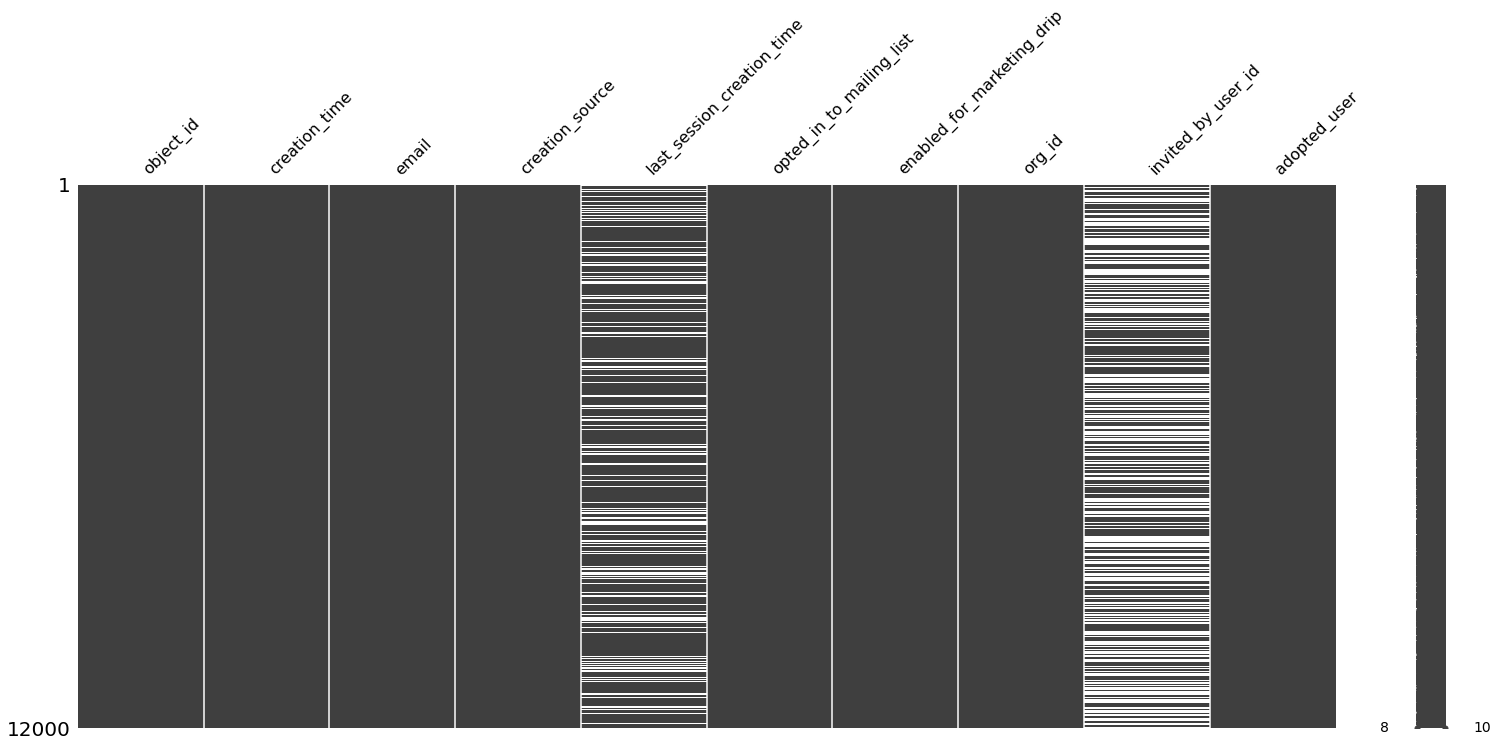

In [53]:
msno.matrix(relax_df)

<AxesSubplot:>

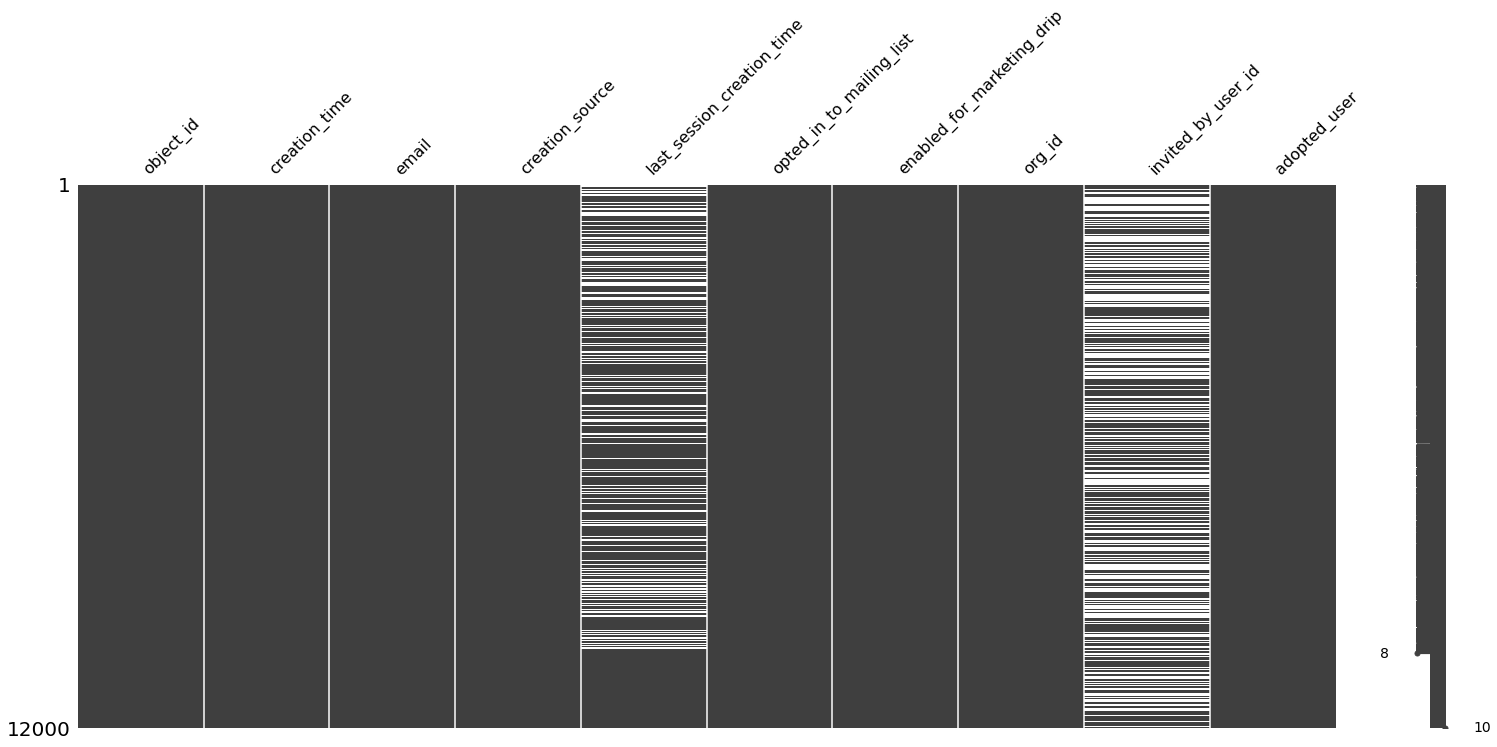

In [54]:
msno.matrix(relax_df.sort_values(by = 'adopted_user'))

# Let's drop last_session_creation_time
It looks like all adopted_users have a last_session_creation_time. We probably can just drop this column.

In [55]:
relax_df = relax_df.drop(columns = 'last_session_creation_time')

In [56]:
relax_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   email                       12000 non-null  object        
 3   creation_source             12000 non-null  object        
 4   opted_in_to_mailing_list    12000 non-null  int64         
 5   enabled_for_marketing_drip  12000 non-null  int64         
 6   org_id                      12000 non-null  int64         
 7   invited_by_user_id          6417 non-null   float64       
 8   adopted_user                12000 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(4), object(2)
memory usage: 797.0+ KB


# Invited column
To resolve the invited_by_user_id missing values, we'll create a column that indicates whether the user was invited, regardless of who invited him or her.

In [57]:
relax_df['invited'] = np.where(relax_df['invited_by_user_id'].notnull(), 1, 0)

In [58]:
relax_df.head()

,object_id,creation_time,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,invited
0,1,2014-04-22 03:53:30,AugustCClausen@yahoo.com,GUEST_INVITE,1,0,11,10803.0,0,1
1,2,2013-11-15 03:45:04,MatthewPoole@gustr.com,ORG_INVITE,0,0,1,316.0,1,1
2,3,2013-03-19 23:14:52,MitchellBottrill@gustr.com,ORG_INVITE,0,0,94,1525.0,0,1
3,4,2013-05-21 08:09:28,NicklasSClausen@yahoo.com,GUEST_INVITE,0,0,1,5151.0,0,1
4,5,2013-01-17 10:14:20,GraceRaw@yahoo.com,GUEST_INVITE,0,0,193,5240.0,0,1


In [59]:
relax_df['invited'].value_counts()

1    6417
0    5583
Name: invited, dtype: int64

In [60]:
relax_df['org_id'].value_counts()

0      319
1      233
2      201
3      168
4      159
      ... 
396      9
400      8
397      8
386      7
416      2
Name: org_id, Length: 417, dtype: int64

# Creating org_size column
As we can see there are 417 different org_ids. It wouldn't make sense to break that down into a categorical variable. So let's create a variable that indicates the size of the user's organization. We'll make a dictionary out of the value counts, then copy the org_id column and use the dictionary to change the values of the copied column.

In [61]:
org_dict = relax_df['org_id'].value_counts().to_dict()
len(org_dict)

417

In [62]:
relax_df['org_size'] = relax_df['org_id']

In [63]:
relax_df = relax_df.replace({'org_size' : org_dict})

In [64]:
relax_df = relax_df.drop(columns = ['email', 'org_id', 'invited_by_user_id'])

In [65]:
relax_df.head()

,object_id,creation_time,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,adopted_user,invited,org_size
0,1,2014-04-22 03:53:30,GUEST_INVITE,1,0,0,1,75
1,2,2013-11-15 03:45:04,ORG_INVITE,0,0,1,1,233
2,3,2013-03-19 23:14:52,ORG_INVITE,0,0,0,1,32
3,4,2013-05-21 08:09:28,GUEST_INVITE,0,0,0,1,233
4,5,2013-01-17 10:14:20,GUEST_INVITE,0,0,0,1,16


# Categorical variables
One-hot encoding the creation_source column.

In [66]:
relax_df = pd.get_dummies(relax_df, columns = ['creation_source'], prefix = 'source')

In [67]:
relax_df.head()

,object_id,creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,adopted_user,invited,org_size,source_GUEST_INVITE,source_ORG_INVITE,source_PERSONAL_PROJECTS,source_SIGNUP,source_SIGNUP_GOOGLE_AUTH
0,1,2014-04-22 03:53:30,1,0,0,1,75,1,0,0,0,0
1,2,2013-11-15 03:45:04,0,0,1,1,233,0,1,0,0,0
2,3,2013-03-19 23:14:52,0,0,0,1,32,0,1,0,0,0
3,4,2013-05-21 08:09:28,0,0,0,1,233,1,0,0,0,0
4,5,2013-01-17 10:14:20,0,0,0,1,16,1,0,0,0,0


# Turning creation_time into column that indicates days as member
First we'll create a date that's a week later than the latest creation time and subtract creation_time from that. Since this data is from 2013 and 2014, we'll act as if it's more recent just so we can analyze it as if it's still current.

In [68]:
relax_df['creation_time'].max()

Timestamp('2014-05-30 23:59:19')

In [69]:
relax_df['last_date'] = relax_df['creation_time'].max() + timedelta(days = 7)

In [70]:
relax_df.head()

,object_id,creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,adopted_user,invited,org_size,source_GUEST_INVITE,source_ORG_INVITE,source_PERSONAL_PROJECTS,source_SIGNUP,source_SIGNUP_GOOGLE_AUTH,last_date
0,1,2014-04-22 03:53:30,1,0,0,1,75,1,0,0,0,0,2014-06-06 23:59:19
1,2,2013-11-15 03:45:04,0,0,1,1,233,0,1,0,0,0,2014-06-06 23:59:19
2,3,2013-03-19 23:14:52,0,0,0,1,32,0,1,0,0,0,2014-06-06 23:59:19
3,4,2013-05-21 08:09:28,0,0,0,1,233,1,0,0,0,0,2014-06-06 23:59:19
4,5,2013-01-17 10:14:20,0,0,0,1,16,1,0,0,0,0,2014-06-06 23:59:19


In [71]:
relax_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   opted_in_to_mailing_list    12000 non-null  int64         
 3   enabled_for_marketing_drip  12000 non-null  int64         
 4   adopted_user                12000 non-null  int32         
 5   invited                     12000 non-null  int32         
 6   org_size                    12000 non-null  int64         
 7   source_GUEST_INVITE         12000 non-null  uint8         
 8   source_ORG_INVITE           12000 non-null  uint8         
 9   source_PERSONAL_PROJECTS    12000 non-null  uint8         
 10  source_SIGNUP               12000 non-null  uint8         
 11  source_SIGNUP_GOOGLE_AUTH   12000 non-null  uint8     

In [72]:
relax_df['creation_time'] = (relax_df['last_date'] - relax_df['creation_time']).dt.days

In [73]:
relax_df.head()

,object_id,creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,adopted_user,invited,org_size,source_GUEST_INVITE,source_ORG_INVITE,source_PERSONAL_PROJECTS,source_SIGNUP,source_SIGNUP_GOOGLE_AUTH,last_date
0,1,45,1,0,0,1,75,1,0,0,0,0,2014-06-06 23:59:19
1,2,203,0,0,1,1,233,0,1,0,0,0,2014-06-06 23:59:19
2,3,444,0,0,0,1,32,0,1,0,0,0,2014-06-06 23:59:19
3,4,381,0,0,0,1,233,1,0,0,0,0,2014-06-06 23:59:19
4,5,505,0,0,0,1,16,1,0,0,0,0,2014-06-06 23:59:19


In [74]:
relax_df = relax_df.rename(columns = {'creation_time' : 'member_time'})

In [75]:
relax_df.head()

,object_id,member_time,opted_in_to_mailing_list,enabled_for_marketing_drip,adopted_user,invited,org_size,source_GUEST_INVITE,source_ORG_INVITE,source_PERSONAL_PROJECTS,source_SIGNUP,source_SIGNUP_GOOGLE_AUTH,last_date
0,1,45,1,0,0,1,75,1,0,0,0,0,2014-06-06 23:59:19
1,2,203,0,0,1,1,233,0,1,0,0,0,2014-06-06 23:59:19
2,3,444,0,0,0,1,32,0,1,0,0,0,2014-06-06 23:59:19
3,4,381,0,0,0,1,233,1,0,0,0,0,2014-06-06 23:59:19
4,5,505,0,0,0,1,16,1,0,0,0,0,2014-06-06 23:59:19


In [76]:
relax_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   member_time                 12000 non-null  int64         
 2   opted_in_to_mailing_list    12000 non-null  int64         
 3   enabled_for_marketing_drip  12000 non-null  int64         
 4   adopted_user                12000 non-null  int32         
 5   invited                     12000 non-null  int32         
 6   org_size                    12000 non-null  int64         
 7   source_GUEST_INVITE         12000 non-null  uint8         
 8   source_ORG_INVITE           12000 non-null  uint8         
 9   source_PERSONAL_PROJECTS    12000 non-null  uint8         
 10  source_SIGNUP               12000 non-null  uint8         
 11  source_SIGNUP_GOOGLE_AUTH   12000 non-null  uint8     

In [77]:
relax_df = relax_df.drop(columns = ['object_id'])

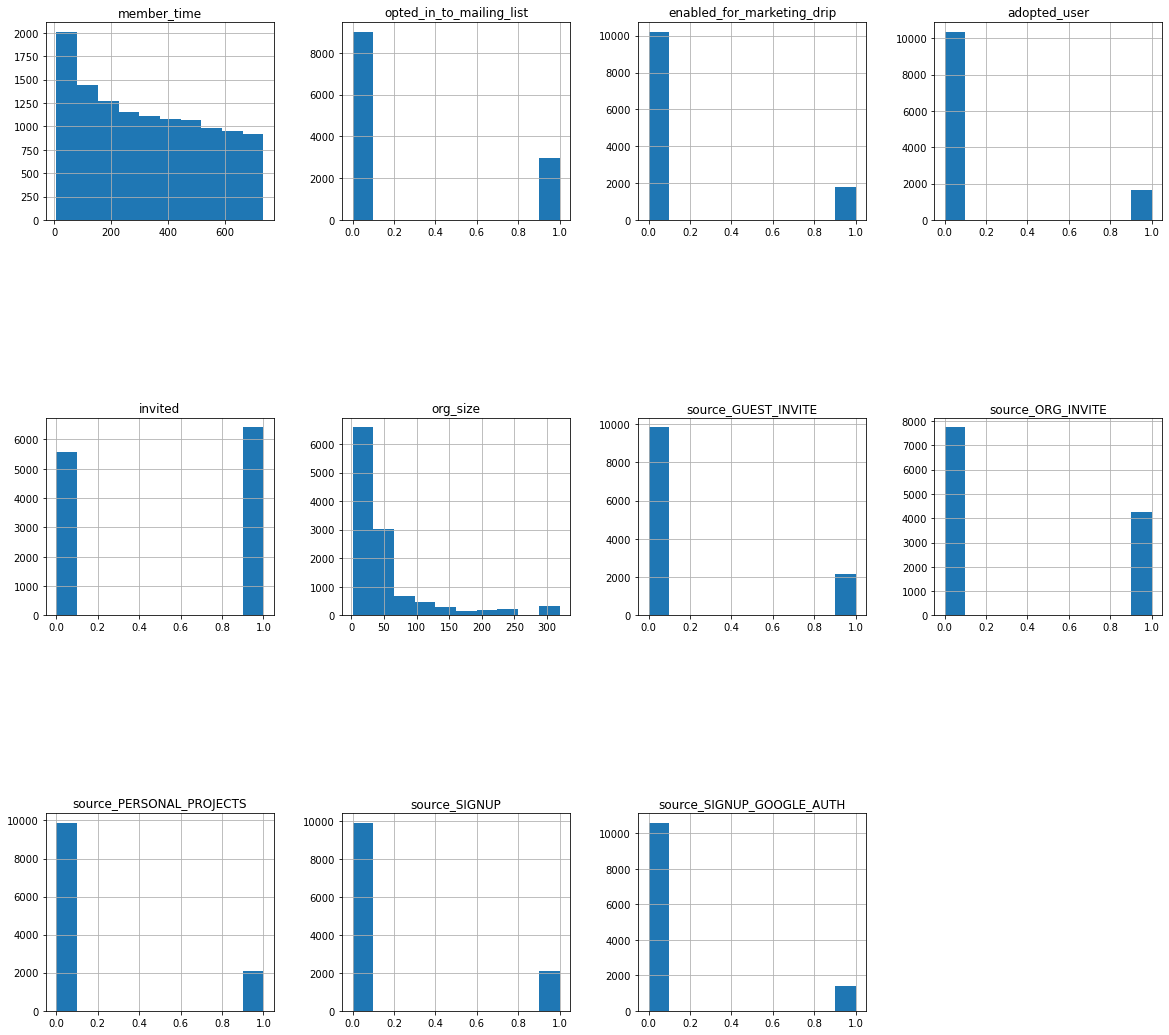

In [78]:
relax_df.hist(layout=(6, 4), figsize=(20,40), bins = 10)
plt.subplots_adjust(hspace=1)
plt.show()

# Heatmap
This heatmap doesn't indicate any strong correlations with our target variable. It makes us wonder if we even need a model at all. We'll just take a look at the percentage of adopted users when each categorical variable is true and see if that reveals anything.

<AxesSubplot:>

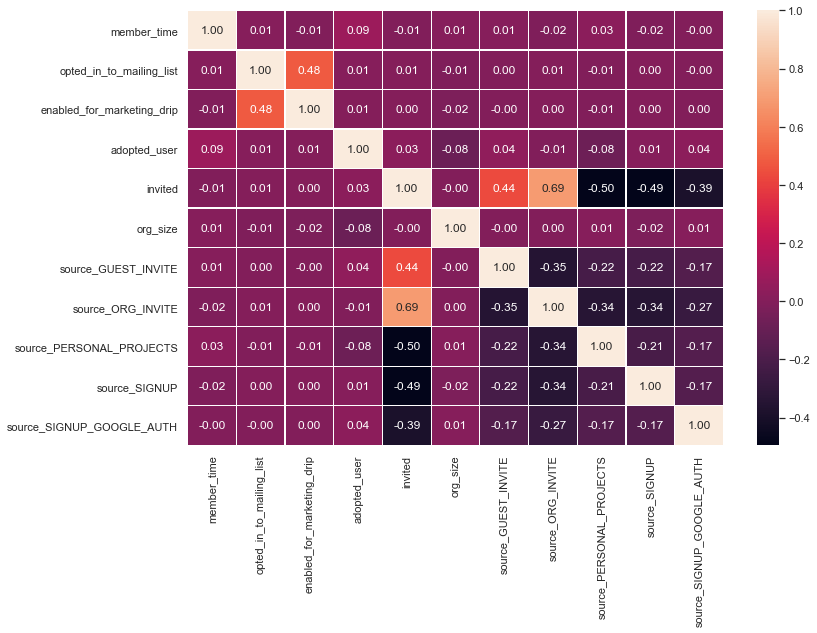

In [79]:
sns.set(rc = {'figure.figsize':(12,8)}, font_scale = 1)
corr = relax_df[relax_df.columns].corr()
#plt.figure(figsize = (30,20))
sns.heatmap(corr, annot = True, linewidths=0.2, fmt=".2f")

In [80]:
categorical_df = relax_df.drop(columns = ['member_time', 'org_size'])

In [81]:
categorical_df.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,adopted_user,invited,source_GUEST_INVITE,source_ORG_INVITE,source_PERSONAL_PROJECTS,source_SIGNUP,source_SIGNUP_GOOGLE_AUTH,last_date
0,1,0,0,1,1,0,0,0,0,2014-06-06 23:59:19
1,0,0,1,1,0,1,0,0,0,2014-06-06 23:59:19
2,0,0,0,1,0,1,0,0,0,2014-06-06 23:59:19
3,0,0,0,1,1,0,0,0,0,2014-06-06 23:59:19
4,0,0,0,1,1,0,0,0,0,2014-06-06 23:59:19


In [82]:
first_column = categorical_df.pop('adopted_user')

In [83]:
categorical_df.insert(0, 'adopted_user', first_column)

In [84]:
categorical_df.head()

,adopted_user,opted_in_to_mailing_list,enabled_for_marketing_drip,invited,source_GUEST_INVITE,source_ORG_INVITE,source_PERSONAL_PROJECTS,source_SIGNUP,source_SIGNUP_GOOGLE_AUTH,last_date
0,0,1,0,1,1,0,0,0,0,2014-06-06 23:59:19
1,1,0,0,1,0,1,0,0,0,2014-06-06 23:59:19
2,0,0,0,1,0,1,0,0,0,2014-06-06 23:59:19
3,0,0,0,1,1,0,0,0,0,2014-06-06 23:59:19
4,0,0,0,1,1,0,0,0,0,2014-06-06 23:59:19


In [85]:
categorical_df = categorical_df.drop(columns = ['last_date'])

In [86]:
all_cols = categorical_df.columns

In [87]:
all_cols

Index(['adopted_user', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'invited', 'source_GUEST_INVITE',
       'source_ORG_INVITE', 'source_PERSONAL_PROJECTS', 'source_SIGNUP',
       'source_SIGNUP_GOOGLE_AUTH'],
      dtype='object')

In [88]:
categories = all_cols[1:]

In [89]:
categories

Index(['opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'invited',
       'source_GUEST_INVITE', 'source_ORG_INVITE', 'source_PERSONAL_PROJECTS',
       'source_SIGNUP', 'source_SIGNUP_GOOGLE_AUTH'],
      dtype='object')

In [92]:
not_adopted_list = []
adopted_list = []
for category in categories:
    temp_df = relax_df[relax_df[category] == 1]
    not_adopted_list.append(temp_df['adopted_user'].value_counts(normalize = True)[0])
    adopted_list.append(temp_df['adopted_user'].value_counts(normalize = True)[1]) 

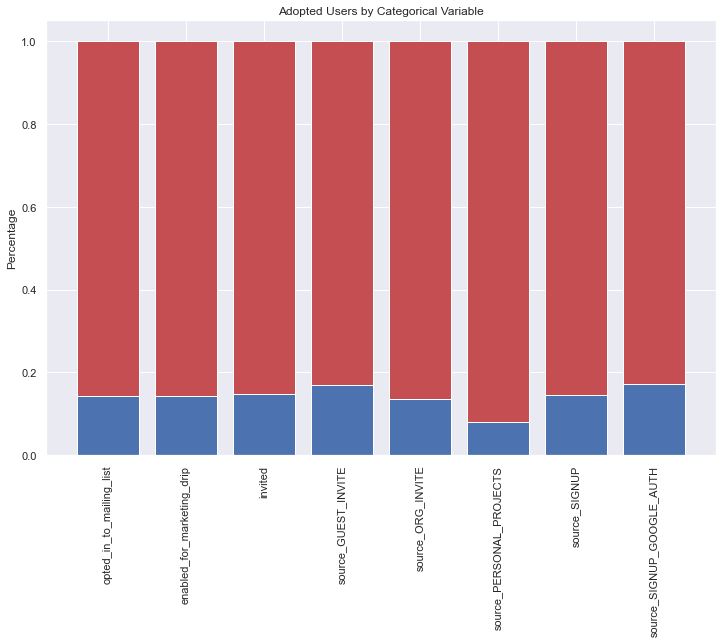

In [95]:
plt.bar(categories, adopted_list, color='b')
plt.bar(categories, not_adopted_list, bottom=adopted_list, color='r')
plt.title('Adopted Users by Categorical Variable')
plt.xticks(rotation = 90)
plt.ylabel('Percentage')
plt.show()

# Conclusion
So it looks like the strongest indicators of adopted users are guest invites and Google Auth signups, and those aren't even that strong since both of those subgroups have about 17 percent of adopted users compared to about 14 percent for the rest. The weakest indicator, with about 8 percent of adopted users, are users who were invited to join another user's personal workspace.